In [62]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
import plotly.express as px
 import seaborn as sns
 from sklearn.naive_bayes import GaussianNB
 from sklearn.pipeline import Pipeline
 import warnings
 warnings.filterwarnings('ignore')

### Reading The CSV File

In [36]:
df = pd.read_csv('heart.csv')

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [39]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [40]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [41]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [43]:
print(f"This dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

This dataframe has 303 rows and 14 columns.


### Exploring The Data Set In Order To Derive Useful Information


In [44]:
df.shape

(303, 14)

In [ ]:
#This shows that our data has 303 rows and 14 columns.

In [45]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [46]:
#We can the column names here

In [47]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


## **Age Factor**

In [48]:
print(f"The minimum age in age column is {df['age'].min()} and maximum age is {df['age'].max()}.")

The minimum age in age column is 29 and maximum age is 77.


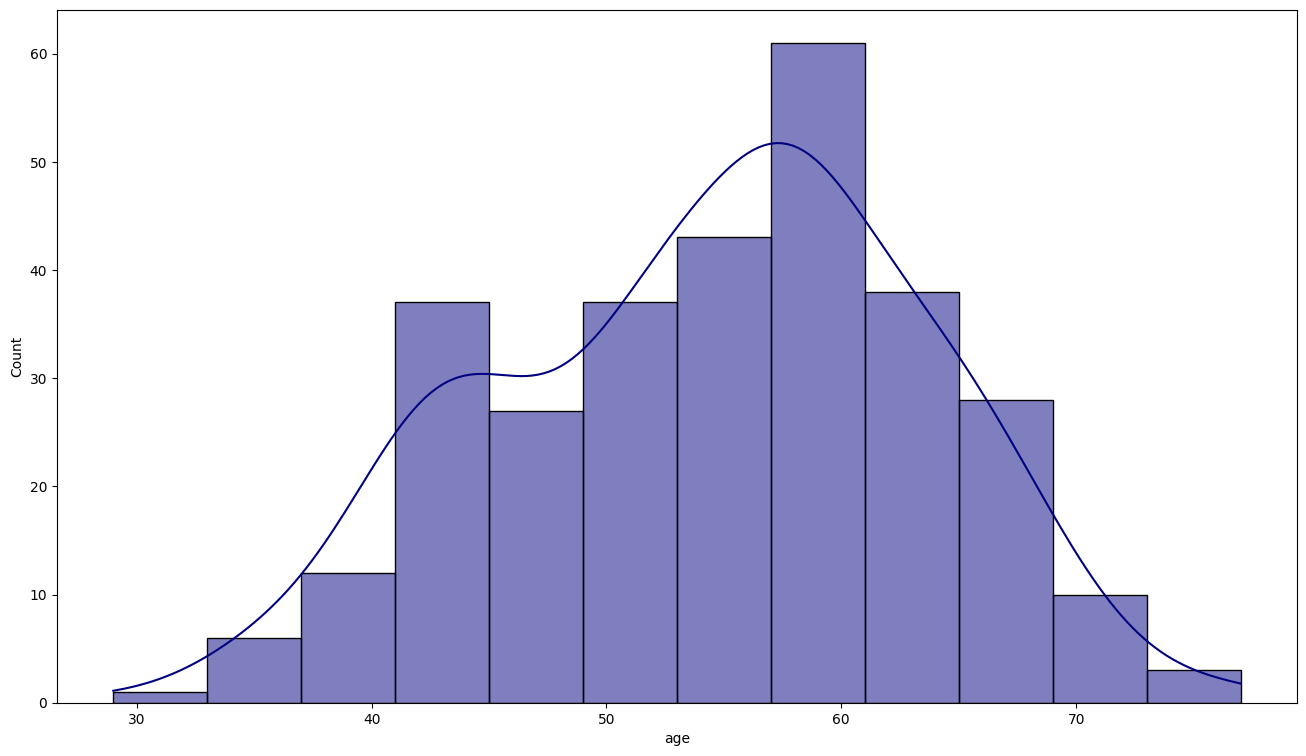

In [49]:
plt.figure(figsize=(16, 9))
sns.histplot(df["age"], kde=True, color="Navy")
plt.show()

Mean: 54.366336633663366
Median: 55.0
Mode: 58


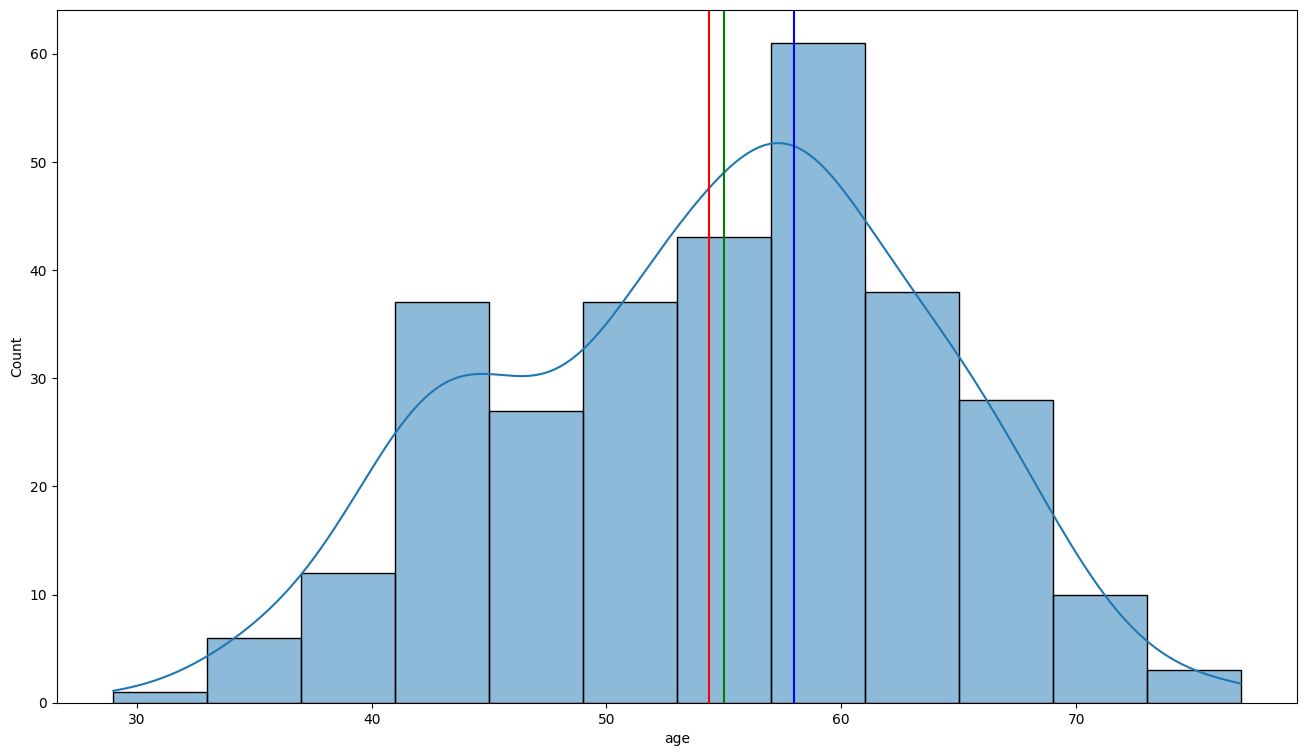

In [50]:
# Set the figure size to 16:9
plt.figure(figsize=(16, 9))

# Plot the mean, median and mode of each column using sns
sns.histplot(df["age"], kde=True)
plt.axvline(df["age"].mean(), color="r")
plt.axvline(df["age"].median(), color="g")
plt.axvline(df["age"].mode()[0], color="b")


# Print the mean, median and mode of each column
print("Mean:", df["age"].mean())
print("Median:", df["age"].median())
print("Mode:", df["age"].mode()[0])

## Finding the correlation among the attributes

<Axes: >

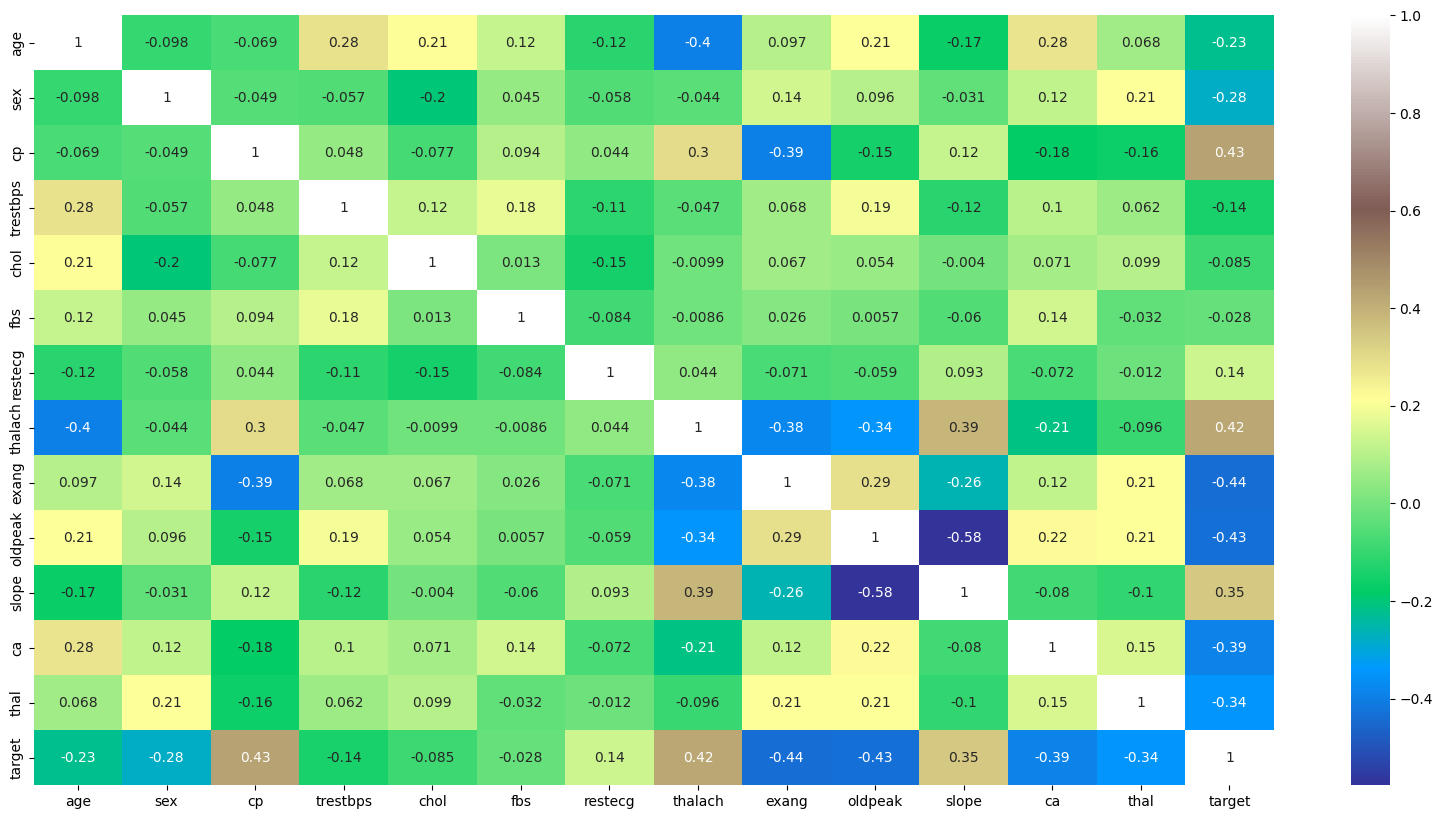

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot= True, cmap = 'terrain')

In [52]:
fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

### Training and Test Split

In [53]:
# 1. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 2. import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 3. Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# 4. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor
from xgboost import XGBClassifier

# 5. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 6. Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [54]:
# checking the distribution of target variable
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [55]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [56]:
!pip install lazypredict


In [57]:
from lazypredict.Supervised import LazyClassifier

In [58]:
clf = LazyClassifier(verbose= 0, ignore_warnings=True, custom_metric= None)


In [59]:
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [00:01<00:00, 23.56it/s]

[LightGBM] [Info] Number of positive: 132, number of negative: 110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 245
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.545455 -> initscore=0.182322
[LightGBM] [Info] Start training from score 0.182322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [60]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.82               0.83     0.83      0.82   
KNeighborsClassifier               0.82               0.82     0.82      0.82   
CalibratedClassifierCV             0.82               0.81     0.81      0.82   
RidgeClassifierCV                  0.82               0.81     0.81      0.82   
RidgeClassifier                    0.82               0.81     0.81      0.82   
LinearDiscriminantAnalysis         0.82               0.81     0.81      0.82   
RandomForestClassifier             0.80               0.80     0.80      0.80   
LinearSVC                          0.80               0.80     0.80      0.80   
NearestCentroid                    0.80               0.80     0.80      0.80   
SVC                                0.80               0.80     0.80      0.80   
NuSVC                       

In [66]:
# create a list of models to evaluate

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),

    ('Support Vector Machine', SVC(random_state=42)),

    ('Naye base Classifier', GaussianNB())


]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent)),
        #('encoder', OneHotEncoder(handle_unknow='ignore'))
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, Y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, Y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(Y_test, y_pred)

    #print the performance metrics
    print("Model", name)
    print("Cross Validation accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print()

    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model: ", best_model)


Model Logistic Regression
Cross Validation accuracy:  0.8137755102040816
Test Accuracy:  0.819672131147541

Model Gradient Boosting
Cross Validation accuracy:  0.8179421768707483
Test Accuracy:  0.7540983606557377

Model KNeighbors Classifier
Cross Validation accuracy:  0.7018707482993196
Test Accuracy:  0.6229508196721312

Model Decision Tree Classifier
Cross Validation accuracy:  0.7723639455782313
Test Accuracy:  0.7868852459016393

Model AdaBoost Classifier
Cross Validation accuracy:  0.7887755102040817
Test Accuracy:  0.7704918032786885

Model Random Forest
Cross Validation accuracy:  0.846938775510204
Test Accuracy:  0.8032786885245902

Model XGboost Classifier
Cross Validation accuracy:  0.8345238095238094
Test Accuracy:  0.7540983606557377

Model Support Vector Machine
Cross Validation accuracy:  0.6566326530612245
Test Accuracy:  0.6229508196721312

Model Naye base Classifier
Cross Validation accuracy:  0.8056972789115647
Test Accuracy:  0.819672131147541

Best Model:  Pipelin